# Module-3

## Query 3.1
Import the file 'gold.csv', which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. 
Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("grayscale")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("gold.csv")

df.set_index("Date", inplace=True)
df.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [2]:
df1=df.dropna(axis=0)

x=[]
y=[]
for i in range(df1.shape[0]):
    a=df1["Open"][i]
    b=df1["High"][i]
    c=df1["Low"][i]
    d=df1["Price"][i]
    x.append([a,b,c,d])
    y.append(df1["Pred"][i])

LR=LinearRegression()

LR.fit(x,y)
LR.coef_

j=df.shape[0]-df1.shape[0]
for i in range(j):
    k=df1.shape[0]+i
    z=[]
    a=df["Open"][k]
    b=df["High"][k]
    c=df["Low"][k]
    d=df["Price"][k]
    z.append([a,b,c,d])
    df["Pred"][k]=LR.predict(z)

In [3]:
x=[]
y=[]
for i in range(df.shape[0]):
    a=df["Open"][i]
    b=df["High"][i]
    c=df["Low"][i]
    d=df["Price"][i]
    x.append([a,b,c,d])
    y.append(df["new"])
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/3, random_state=1)
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
accuracy=r2_score(y_test, y_pred)
print("Accuracy=",accuracy)

Accuracy= -69.49569639252199


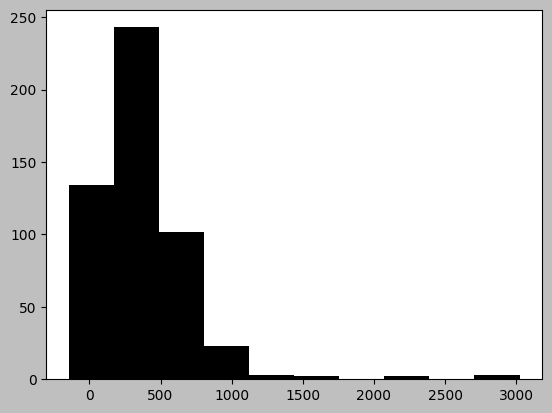

In [4]:
plt.hist(df["Pred"])
plt.show()

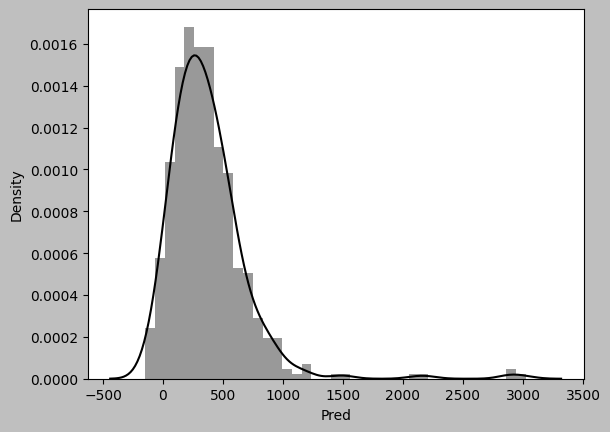

In [5]:
sns.distplot(df["Pred"])
plt.show()

### Explaination:
Column "Pred" is the Linear function while column "new" is the polynomial.

## Query 3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression ,calculate - 

The daily Beta value for the past 3 months. (Daily= Daily returns)

The monthly Beta value. (Monthly= Monthly returns)

In [6]:
df2=pd.read_csv("NCC.csv")
df3=pd.read_csv("Nifty50.csv")

df2["pct change"]=df2["Close Price"].pct_change()*100
df3["pct change"]=df3["Close"].pct_change()*100

ncc_pct_change=np.array(df2["pct change"].tail(63)).reshape(-1,1)
nifty50_pct_change=np.array(df3["pct change"].tail(63)).reshape(-1,1)

LR.fit(nifty50_pct_change, ncc_pct_change)

print("The daily Beta value for the past 3 months=",LR.coef_)

The daily Beta value for the past 3 months= [[1.54215028]]


In [7]:
df2["Date"]=pd.to_datetime(df2["Date"], format='%d-%b-%Y')
df2["Month"]=df2["Date"].dt.month
df2["Year"]=df2["Date"].dt.year
df4=df2[["Month","Year","Close Price"]].groupby(["Month","Year"]).tail(1)

df4["pct change"]=df4["Close Price"].pct_change()*100
df4=df4.dropna(axis=0)

df3["Date"]=pd.to_datetime(df3["Date"], format='%d-%b-%Y')
df3["Month"]=df3["Date"].dt.month
df3["Year"]=df3["Date"].dt.year
df5=df3[["Month","Year","Close"]].groupby(["Month","Year"]).tail(1)

df5["pct change"]=df5["Close"].pct_change()*100
df5=df5.dropna(axis=0)

ncc_pct_change=np.array(df4["pct change"]).reshape(-1,1)
nifty50_pct_change=np.array(df5["pct change"]).reshape(-1,1)

LR.fit(nifty50_pct_change, ncc_pct_change)

print("The monthly Beta value=", LR.coef_)

The monthly Beta value= [[1.93969169]]


### Explaination:
Daily beta value for the past 3 motnhs for the stock NCC is 1.54215028 which is more than 1 and hence it is more volatile than the benchmark.


The monthly beta value for the stock NCC is 1.93969169 which is more than 1 and hence it is more volatile than the benchmark.